In [107]:
cd /content/drive/MyDrive/Colab Notebooks/Kaggle/store-sales

/content/drive/MyDrive/Colab Notebooks/Kaggle/store-sales


# Time Series

## [1] data load and preprocessing

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
train = pd.read_csv("train.csv", index_col="id")
test = pd.read_csv("test.csv", index_col="id")

In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 137.4+ MB


In [111]:
# 컬럼명 받아서 datetime 바꿔주는 함수
def to_datetime(df:pd.DataFrame, col_name:str):
    import pandas as pd
    df[col_name] = pd.to_datetime(df[col_name])
    return df

In [112]:
train_dt = to_datetime(train, "date")
test_dt = to_datetime(test, "date")

In [113]:
# 컬럼명 받아서 연, 월, 주, 요일로 바꿔주는 함수
def make_date_columns(df:pd.DataFrame, col_name:str):
    df['year'] = df[col_name].dt.year
    df['month'] = df[col_name].dt.month
    df["week"] = df[col_name].dt.week
    df["day_of_week"] = df[col_name].dt.day_name()
    return df

In [114]:
train_dt_add = make_date_columns(train_dt, 'date')
test_dt_add = make_date_columns(test_dt, 'date')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [115]:
train_dt_add.head(5)

,date,store_nbr,family,sales,onpromotion,year,month,week,day_of_week
id,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,Tuesday
1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,Tuesday
2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,Tuesday
3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,Tuesday
4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,Tuesday


In [116]:
index = train_dt_add["sales"].idxmax()

train_dt_add.iloc[index, :]

date           2016-05-02 00:00:00
store_nbr                        2
family                   GROCERY I
sales                     124717.0
onpromotion                     59
year                          2016
month                            5
week                            18
day_of_week                 Monday
Name: 2163723, dtype: object

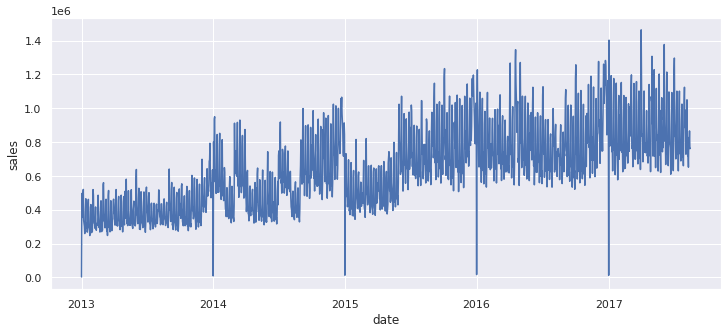

In [117]:
p1 = pd.pivot_table(data=train_dt_add, index="date", values="sales", aggfunc="sum")

sns.set(rc={'figure.figsize':(12,5)})
sns.lineplot(data=p1, x="date", y="sales");

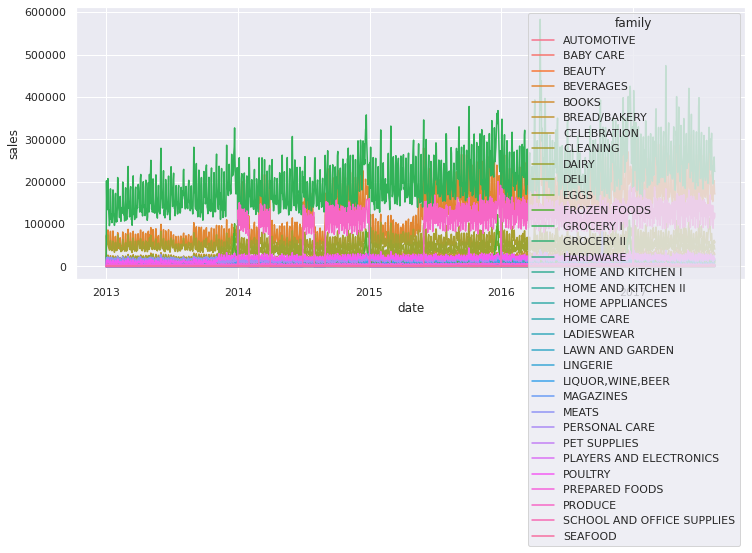

In [118]:
p2 = pd.pivot_table(data=train_dt_add, index=["date", "family"], values="sales", aggfunc="sum").reset_index()

sns.set(rc={'figure.figsize':(12,5)})
sns.lineplot(data=p2, x="date", y="sales", hue="family");

In [119]:
train_gr = train_dt_add.loc[train_dt_add["family"] == "GROCERY I"]
test_gr = test_dt_add.loc[test_dt_add["family"] == "GROCERY I"]

In [120]:
train_gr.head()

,date,store_nbr,family,sales,onpromotion,year,month,week,day_of_week
id,,,,,,,,,
12,2013-01-01,1,GROCERY I,0.0,0,2013,1,1,Tuesday
45,2013-01-01,10,GROCERY I,0.0,0,2013,1,1,Tuesday
78,2013-01-01,11,GROCERY I,0.0,0,2013,1,1,Tuesday
111,2013-01-01,12,GROCERY I,0.0,0,2013,1,1,Tuesday
144,2013-01-01,13,GROCERY I,0.0,0,2013,1,1,Tuesday


## [2] ARIMA

In [121]:
import statsmodels.tsa.api as tsa

In [122]:
train_time = pd.pivot_table(data=train_gr, index="date", values="sales", aggfunc="sum")

In [123]:
y = train_time["sales"].resample("1D").mean()

In [124]:
y.isnull().sum()

4

In [125]:
y1 = y.fillna(method="ffill")

In [133]:
from pylab import rcParams

rcParams["figure.figsize"] = 13, 7

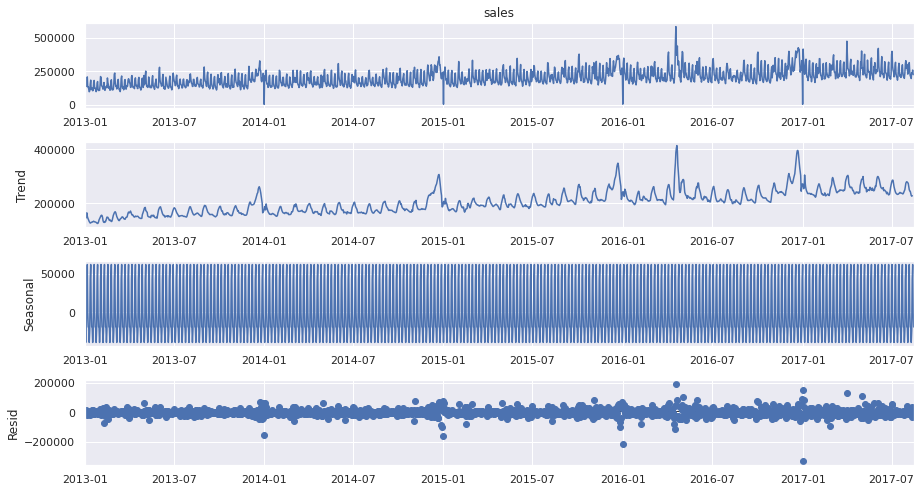

In [134]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y1, model="additive")
# 시각화
fig = model_series.plot()
plt.show()